In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pandas as pd


In [11]:
#CSV data from keggle 4 files
plant1_Gen = pd.read_csv('https://github.com/Mcristina1203/Data-Science-Final/raw/master/Plant_1_Generation_Data.csv')



In [12]:
plant2_Gen = pd.read_csv('https://github.com/Mcristina1203/Data-Science-Final/raw/master/Plant_2_Generation_Data.csv')

In [13]:
plant1_W = pd.read_csv('https://github.com/Mcristina1203/Data-Science-Final/raw/master/Plant_1_Weather_Sensor_Data.csv')

In [14]:
plant2_W = pd.read_csv('https://github.com/Mcristina1203/Data-Science-Final/raw/master/Plant_2_Weather_Sensor_Data.csv')

In [15]:
plant1_Gen[0::20]

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
20,15-05-2020 00:00,4135001,zVJPv84UY57bAof,0.0,0.0,0.0,7116151.0
40,15-05-2020 00:15,4135001,zBIq5rxdHJRwDNY,0.0,0.0,0.0,6339380.0
60,15-05-2020 00:30,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,0.0,7007866.0
80,15-05-2020 00:45,4135001,wCURE6d3bPkepu2,0.0,0.0,0.0,6782598.0
...,...,...,...,...,...,...,...
68680,17-06-2020 22:45,4135001,iCRJl6heRkivqQ3,0.0,0.0,5957.0,7426263.0
68700,17-06-2020 23:00,4135001,adLQvlD726eNBSB,0.0,0.0,6110.0,6524508.0
68720,17-06-2020 23:15,4135001,ZnxXDlPa8U1GXgE,0.0,0.0,5929.0,6770737.0
68740,17-06-2020 23:30,4135001,WRmjgnKYAwPKWDb,0.0,0.0,5953.0,7273532.0


In [16]:
plant1_W[0::20]

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.000000
20,2020-05-15 05:00:00,4135001,HmiyD2TTLFNqkNe,24.177106,22.551908,0.000000
40,2020-05-15 10:00:00,4135001,HmiyD2TTLFNqkNe,28.632192,52.547736,0.670675
60,2020-05-15 15:00:00,4135001,HmiyD2TTLFNqkNe,33.890576,46.029081,0.398889
80,2020-05-15 20:00:00,4135001,HmiyD2TTLFNqkNe,22.663180,20.290726,0.000000
...,...,...,...,...,...,...
3100,2020-06-17 03:30:00,4135001,HmiyD2TTLFNqkNe,22.771295,22.362781,0.000000
3120,2020-06-17 08:30:00,4135001,HmiyD2TTLFNqkNe,24.255999,32.832243,0.275448
3140,2020-06-17 13:30:00,4135001,HmiyD2TTLFNqkNe,28.954923,44.689929,0.659398
3160,2020-06-17 18:30:00,4135001,HmiyD2TTLFNqkNe,23.840239,22.968658,0.007007


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=3)

NameError: name 'x' is not defined

In [18]:
features = [
    'DATE_TIME',
    'PLANT_ID', 
    'AMBIENT_TEMPERATURE',
    'MODULE_TEMPERATURE'
    
]
x = plant1_W[features]
y = plant1_W['IRRADIATION']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=3)

print(x_train.shape)
print(y_train.shape)


print(x_test.shape)
print(y_test.shape)


(2068, 4)
(2068,)
(1114, 4)
(1114,)


In [19]:
features = [
    'DATE_TIME',
    'PLANT_ID', 
    'SOURCE_KEY',
    'DC_POWER', 
    'AC_POWER', 
    'DAILY_YIELD'
    
]
x = plant1_Gen[features]
y = plant1_Gen['TOTAL_YIELD']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=3)

print(x_train.shape)
print(y_train.shape)


print(x_test.shape)
print(y_test.shape)

(44705, 6)
(44705,)
(24073, 6)
(24073,)


In [20]:
logreg = LogisticRegression(solver='liblinear', multi_class='auto')

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=45, random_state=32)


In [22]:
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)

In [23]:

def predict(x_train, y_train, x_test, model):
    model.fit(x_train, y_train)
    return model.predict(x_test)

def predictProb(x_train, y_train, x_test, model):
    model.fit(x_train, y_train)
    return model.predict_proba(x_test)

In [24]:
def accuracy(x_train, y_train, x_test, y_test, model_tuples):
    """
    model_tuples -> [('model description', model_object),...]
    """
    _dict = {desc: accuracy_score(y_test, predict(x_train, y_train, x_test, model)) for (desc, model) in model_tuples}
    df = pd.DataFrame()
    df['Model'], df['Accuracy'] = _dict.keys(), _dict.values()
    return df

def computeROCmatrics(y_test, y_predict_prob, positive_label=1):
    """
    return -> (fpr, tpr, AUC, thresholds)
    """
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,positive_label-1], pos_label=positive_label)
    AUC = metrics.auc(fpr, tpr)
    return (fpr, tpr, AUC, thresholds)

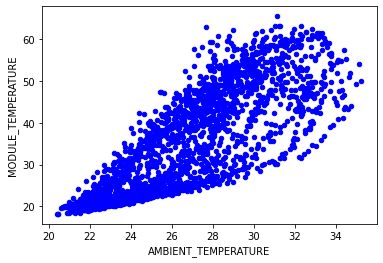

In [25]:
#Plant 1
plant1_W.plot(kind='scatter',x='AMBIENT_TEMPERATURE',y='MODULE_TEMPERATURE',color='blue')

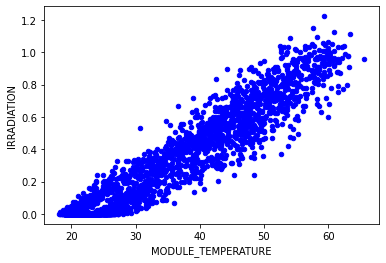

In [26]:
plant1_W.plot(kind='scatter',x='MODULE_TEMPERATURE',y='IRRADIATION',color='blue')

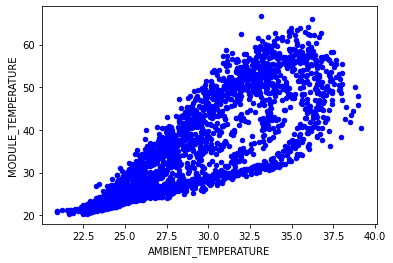

In [27]:
#Plant 2
plant2_W.plot(kind='scatter',x='AMBIENT_TEMPERATURE',y='MODULE_TEMPERATURE',color='blue')

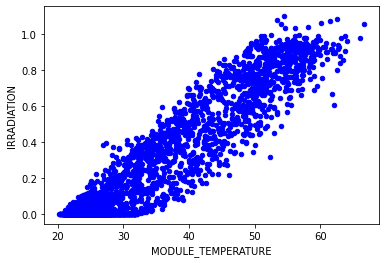

In [28]:
plant2_W.plot(kind='scatter',x='MODULE_TEMPERATURE',y='IRRADIATION',color='blue')


In [29]:
#Conclusion Plant 2 has weaker ambient temperature and module temperature 
# The Ambient temperature raises module temperature and affects DC and AC power by solar power generator.
# In order to predict the cleaning and maintenance we have to train it on linear regression model for plant 2 data
# use plant 2

x_train, y_train = plant1_W[['AMBIENT_TEMPERATURE']], plant1_W['MODULE_TEMPERATURE']

In [30]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [31]:
x_test, y_test = plant2_W[['AMBIENT_TEMPERATURE']], plant2_W['MODULE_TEMPERATURE']

In [32]:
y_pred = linear_model.predict(x_test)
y_pred
#prediction from linear regression t find out mean absolute error

array([35.68780047, 35.30102462, 34.68083382, ..., 24.298416  ,
       24.09966661, 23.82452082])

In [33]:
mean_absolute_error(y_test, y_pred)

6.832550538736293

In [34]:
# now we take plannt 1 and 2 irradiation and compare error 
x_train, y_train = plant2_W[['MODULE_TEMPERATURE']], plant2_W['IRRADIATION']

In [35]:
x_train, y_train = plant1_W[['MODULE_TEMPERATURE']], plant1_W['IRRADIATION']

In [36]:
inear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [37]:
y_pred = linear_model.predict(x_test)
y_pred

array([0.13190759, 0.12898323, 0.12429406, ..., 0.04579415, 0.04429144,
       0.0422111 ])

In [38]:
#HIGHER ERROR FOR IRRADIATIONf
mean_absolute_error(y_test, y_pred)

32.61538282012105